# Enkel lineærregresjon med leieindeks-data (ISTX1003)

Denne notatboken ble brukt på Zoom-forelsning nr 1, 21.10.2020, se også forelesningsnotater fra timen på https://www.math.ntnu.no/emner/IST100x/ISTx1003/Zoom1InClass20201021.pdf

Spørsmål: hva er sammenhengen mellom leiepris for leiligheter i München og areal for leiligheten?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)# fordi en av plottefunksjonene må oppdateres av utvikler og kommer per i dag med lang FutureWarning som vi ikke vil se på
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# Steg 1: Bli kjent med data

Hva ser vi etter når vi ser på oppsummeringsmål og plott av data?

In [2]:
filurl="http://www.uni-goettingen.de/de/document/download/64c29c1b1fccb142cfa8f29a942a9e05.raw/rent99.raw"
df=pd.read_csv(filurl," ") # bruker mellomrom mellom kolonner
print(df.shape)
df.sort_values(by=['area'],inplace=True)  # Sorterer datasettet mhp area (for plotting)
print(df.head()) # Merk at den originale indekseringen av rader bevares
print(df[['rent','area']].describe())
print(df[['rent','area']].corr())


(3082, 9)
            rent    rentsqm  area   yearc  location  bath  kitchen  cheating  \
1352  237.076920  11.853846    20  1967.0         1     0        0         1   
2971  289.435913  14.471794    20  1957.5         2     0        0         1   
1454  175.641022   8.782051    20  1956.0         1     0        0         1   
2955  330.820496  16.541027    20  1972.0         2     0        0         1   
2491  188.358963   8.969472    21  1966.0         3     0        0         1   

      district  
1352       822  
2971       372  
1454      1812  
2955       411  
2491      1853  
              rent         area
count  3082.000000  3082.000000
mean    459.437179    67.374757
std     195.656638    23.720446
min      40.512821    20.000000
25%     322.025635    51.000000
50%     426.974350    65.000000
75%     559.358994    81.000000
max    1843.384644   160.000000
          rent      area
rent  1.000000  0.584531
area  0.584531  1.000000


I denne presentasjonene skal vi bare se på `rent` som respons og `area` som forklaringsvariabel. 

Legg merke til oppsummerende mål: minste leilighet er 20 m$^2$ og største er 160 m$^2$. Leien går fra 40.5 til 1843 Euro pr måned.

Vi plotter disse hver for seg og mot hverandre.

<function matplotlib.pyplot.show(*args, **kw)>

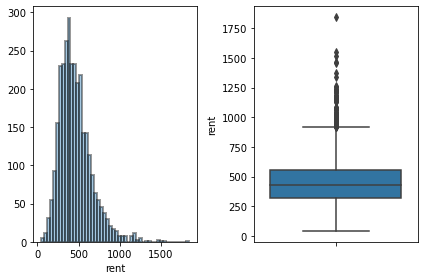

In [3]:
plt.subplot(1, 2, 1)
sns.distplot(df['rent'], 
             kde = False, hist_kws=dict(edgecolor="k", linewidth=2))

plt.subplot(1, 2, 2)
sns.boxplot(y='rent',data=df)

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

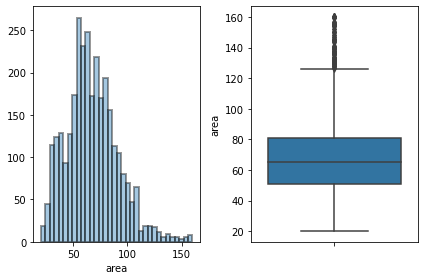

In [4]:
plt.subplot(1, 2, 1)
sns.distplot(df['area'], 
             kde = False, hist_kws=dict(edgecolor="k", linewidth=2))

plt.subplot(1, 2, 2)
sns.boxplot(y='area',data=df)

plt.tight_layout()
plt.show

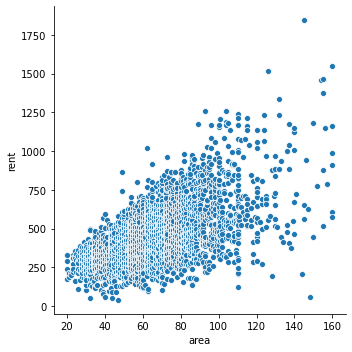

In [5]:
sns.relplot(x='area', y='rent',data = df)
plt.show()

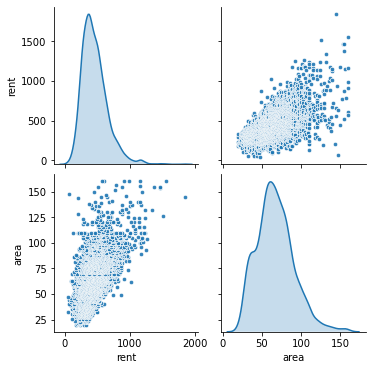

In [6]:
sns.pairplot(df, vars = ['rent','area'], 
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.9, 's': 20})
             #plot_kws=dict(alpha=0.4)
plt.show()

# Steg 2: Spesifiser en matematisk modell 

Hvordan bruker vi en såkalt modellformel for å spesifisere regresjonsmodellen?

In [7]:
formel='rent~area'

# Steg 3: Initialiser og tilpass modellen

In [8]:
modell = smf.ols(formel,data=df)
resultat = modell.fit()

# Steg 4: Presenter resultater fra den tilpassede modellen 

* Hva er ligningen for den estimerte regresjonsmodellen? Hva betyr de ulike elementene?
* Hvordan kan vi tolke den estimerte verdien til skjæringspunktet $\hat{\beta}_0$, og til stigningstallet $\hat{\beta}_1$?
* Hva er den beste måten å kommunisere usikkerhet i stigningstallet (og skjæringspunktet)?
* Hva betyr det at en forklaringsvariabel er signifikant?

In [9]:
print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     1599.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):          6.13e-282
Time:                        17:39:44   Log-Likelihood:                -19990.
No. Observations:                3082   AIC:                         3.998e+04
Df Residuals:                    3080   BIC:                         4.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.5922      8.613     15.626      0.0

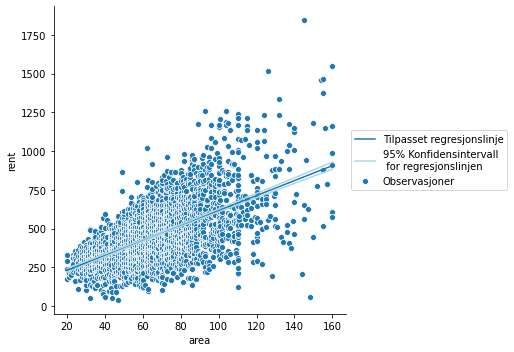

In [12]:
predres = resultat.get_prediction().summary_frame(alpha = 0.05)  # Estimert forventningsverdi, prediksjon og intervaller
df_pred = pd.concat([df[["area","rent"]], predres], axis=1)
sns.relplot(x="area", y="rent",data = df_pred, label="Observasjoner")
sns.lineplot(x='area', y='mean', data = df_pred, label = "Tilpasset regresjonslinje")
sns.lineplot(x='area', y='mean_ci_lower', data = df_pred, color = "lightblue",label = "95% Konfidensintervall \n for regresjonslinjen")
sns.lineplot(x='area', y='mean_ci_upper', data = df_pred, color = "lightblue")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("rent")
plt.show()

# Steg 5: Evaluer om modellen passer til dataene

* Hva er modellantagelsene våre?
* Hvordan sjekker vi at modellantagelsene er oppfylt med plott?
* Hvordan evaluerer vi godheten til modellen?


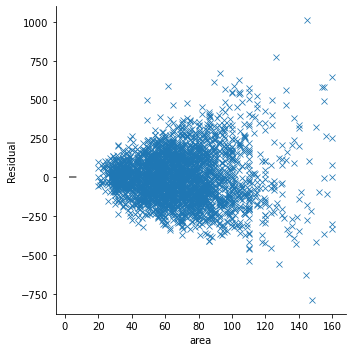

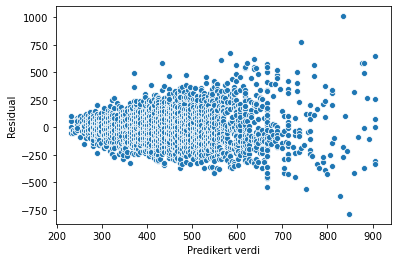

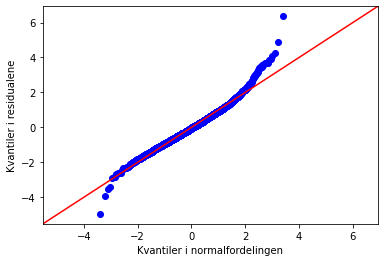

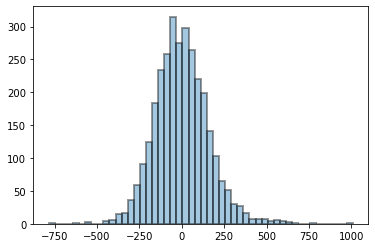

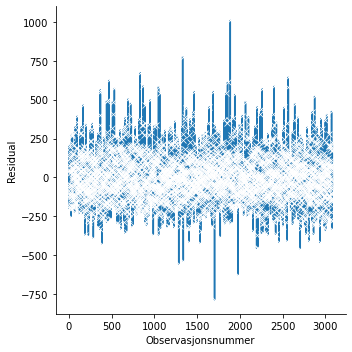

In [13]:
df_resid = pd.DataFrame({"area": df["area"], "Residual": resultat.resid} ) 
sns.relplot(x='area', y="Residual",data = df_resid,marker="x")
plt.plot([2.5, 8], [0, 0], color = "grey",linewidth=2, linestyle = "--")
plt.show()

sns.scatterplot(resultat.fittedvalues, resultat.resid)
plt.ylabel("Residual")
plt.xlabel("Predikert verdi")
plt.show()

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(resultat.resid,line='45',fit=True)
plt.ylabel("Kvantiler i residualene")
plt.xlabel("Kvantiler i normalfordelingen")
plt.show()

sns.distplot(resultat.resid, 
             kde = False, hist_kws=dict(edgecolor="k", linewidth=2))
plt.show()
# versjon 11 av seaborn har også ecdfplot

df_resid['Observasjonsnummer'] = df_resid.index
sns.relplot(x='Observasjonsnummer', y="Residual",
            data = df_resid,marker="x", kind="line")

In [ ]:
## Andel forklart variasjon $R^2$


In [22]:
print(resultat.rsquared_adj)
print(resultat.rsquared)

SSE=3082*resultat.mse_resid
SST=3082*np.var(df['rent'])
print(SSE)
print(SST)
1-SSE/SST

0.3414622437638283
0.3416759853270338
77696684.45179138
117945362.87408005


0.3412485022006221

# Steg 6: Prediksjoner

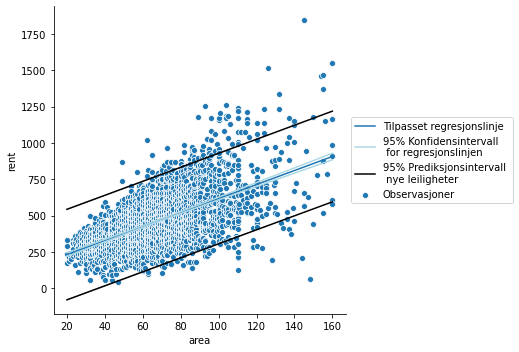

In [21]:
sns.relplot(x='area', y='rent',data = df_pred, label="Observasjoner")
sns.lineplot(x='area', y='mean', data = df_pred, label = "Tilpasset regresjonslinje")

sns.lineplot(x='area', y='mean_ci_lower', data = df_pred, color = "lightblue",label = "95% Konfidensintervall \n for regresjonslinjen")
sns.lineplot(x='area', y='mean_ci_upper', data = df_pred, color = "lightblue")

sns.lineplot(x='area', y='obs_ci_lower', data = df_pred, color = "black",label = "95% Prediksjonsintervall \n nye leiligheter")
sns.lineplot(x='area', y='obs_ci_upper', data = df_pred, color = "black")

plt.ylabel("rent")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Kan vi gjøre det bedre?

In [ ]:
df=pd.concat([df_in['Result'],
              df_in['DBF.1']-df_in['DBF.2'], 
              df_in['ACE.1']-df_in['ACE.2'],
              df_in['UFE.1']-df_in['UFE.2']],axis=1)
df.columns=['y','dobbeldiff','acediff','upressetdiff']
df.dropna(inplace=True)
print(df.describe())